# Project Instruction

- Please rename this file so that you know which copy you have been working in. Keep a copy safe (especially if you are working in the online Jupyter service). You can download a copy by choosing -File- then -Download as- Notebook from the menu above. 
- Complete all of the tasks. 
- Make sure your code is readable, organised, and commented appropriately.

---

## Task 1 - Code review

This task is to write a code review, *not* to write python code to solve the problem brief.  

A colleague has been asked to write a program to calculate a root of a continuous function using the **bisection method** as described in the following brief:

---

### Brief

The bisection method is a simple numerical technique to find a root of a continuous function in an interval where this function changes sign. According to [Intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem), the continuous function $f=f(x)$ has at least one root in the interval $[a, b]$, if $f(a)f(b) \leq 0$. Utilising this fact, the following 3-step algorithm will find the root of such function within a desired accuracy:

1. Calculate the midpoint $c = (a+b)/2$ and evaluate the function at this point $f(c)$.
2. If $ (b-a)/2 < \epsilon_1 $ or $|f(c)| < \epsilon_2 $, then return $c$ as the root and stop. 
3. Otherwise, depending on the sign of $f(c)$ replace either $a$ or $b$ with $c$, such that $f(a)f(b) < 0$ for the new $a$ and $b$. Then go to step 1.

The criteria introduced in step 2 ensures the difference between the answer and the real root to be less than $\epsilon_1$ or _that_ the function value at the answer is smaller than $\epsilon_2$ (so it can be considered an approximate root). You are supposed to write a function that takes $a$, $b$, $\epsilon_1$ and $\epsilon_2$ as inputs and returns a root using the bisection method. 

Note that the bisection method does not guarantee or detect a change of sign in an interval if the two end points have similar signs. Hence, your program should first search for some subinterval where the function changes sign. This can be achieved by halving the intervals consecutively until in one of the smaller subinterval the function changes sign. If no such an interval is found while the size of the smallest interval is still bigger than $\epsilon_1$, the function returns 'None' and prints out "failed to find a root". 

Test your code for a continuous function on a given interval.  

### Your task:

You have been asked to write a review of their code. Here is the code they wrote:

In [1]:
from math import *

def root_finder(a,b,eps1,eps2):
# First find an interval where the function changes sign
    if ff(a)*ff(b)>0:
        findinterval = 0
    else:
            findinterval = 1
        
    n = 2;
    while (findinterval == 0) and ( (b-a)/n > eps1):
        subintervals =[a + i*(b-a)/n for i in range(n+1)]
        print(subintervals)
        n *= 2
        for j in range(n):
            i = j + 1
            if (ff(subintervals[i])<0):
                a = subintervals[i-1]
                b = subintervals[i]
                findinterval = 1.0
                break
   
        
    if (findinterval == 0):
        print("failed to find a root")
    else:
        # implement the bisection method
        if (abs(ff(a))<eps2): # check if a or b are roots:
            return a
        if (abs(ff(b))<eps2):
            # print(b)
            return b
        while ((b-a) > eps1): 
            c = (a+b)/2
            print(c)
            if (ff(c)<eps2):
                return c
            else:
                if ff(b)*ff(c)>0:
                    b = c
                else:
                        a = c
        return c
    
                                
def ff(x):
    y = x**2-5*x+4 
    # y = sin(2*pi*x)
    return y
    
 # Test for x^2-5x+4 from 0 to 2 
my_root = root_finder(0,2,.0001,0.00001)
print('the root is', my_root)

1.0
the root is 1.0


You should write your review here. 
Things you could choose to discuss:
- Code structure 
- Code style
- Does it answer the brief?
- Does it work? If not_,_ could it be fixed?
- Can you explain what it does?

Keep your answer relatively brief (approx. 500 words).

### Answer:

If we look at the code structure, there is immediately confusion because ```ff()``` is used in line 5, and it only gets defined at the end of the programme. The ```ff()``` function should move to the top before the ```root_finder()```. The $i = j + 1$ is unnecessary, since the range can also be altered in such a way that this line can be left out. The $i$ index here can also result in a list index which is out of range.
With regard to the code style, a couple of things stand out:
- The commenting is inconsistent and there should be much more comments.
- There is an inconsistent use of spaces.
- At 2 spots in the programme there is too much indentation after an ```else:```.
- There are a couple of unnecessary ```print()``` statements. Only print the final answer or really important intermediate steps in a finished piece of code.
- The commented function in the ```ff()``` function does not add anything to the programme
- It is not clear why there is a ; after $n = 2$.
The brief is not answered, since the programme in its current form will never return 'None' and print out "failed to find a root". The output of the function is indeed the right solution to the root finding problem in this particular case at least. The while loop has 2 restrictions and if n just keeps increasing until the second restriction is not true anymore, the while loop does not output anything with regard to finding an interval and the function will then not work.

The way I understand it, the programme works as follows:
We start by looking for an interval in which the function changes sign. If the function values at the begin and endpoint multiplied together are positive, if this is the case we keep searching for an interval with a sign change and otherwise we start the bisection method. If the sign does not change, we enter the while loop which creates the list subintervals. Once a subinterval has been found which makes the sign flip, the $a$ and $b$ value are stored and we move to the bisection method. Here we check if $a$ or $b$ is a root by checking if the absolute value of the function value is smaller than epsilon. If that is not the case we run into a while loop with the condition that $b-a$ should be larger than epsilon (a division by $2$ is missing here). In the while loop $c$ is calculated, when the absolute value of $f(c)$ is smaller than epsilon, $c$ is the root. Otherwise, depending on the sign of $f(c)$ we replace either $a$ or $b$ with $c$, such that $f(a)f(b)<0$.

---

## Task 2 - Traffic Modelling

### Task 2a - update rule

For this task, you will work on a model of road traffic using discretised cells, which is an example of a larger class of models in computer science called [cellular automaton](https://en.wikipedia.org/wiki/Cellular_automaton). Imagine a road that is divided into a number of cells which can contain only one car. For now, let's assume this road is one-way from left to right. We also discretise time into steps. At each step a car moves to its adjacent right cell if it is empty; otherwise, it stays where it is (see the figure below). 

![](schematicroad.png)

We use a periodic boundary condition such that a car that moves off the right-most cell enters into the left-most cell as shown by the red arrow in the schematic above (if you like you can think of this problem as representing a roundabout rather than a straight section of a road).

You should write a function that finds the position of cars in the next step given their positions in the current step. To do this systematically, we can define the numpy array `R[i,t]` that is 0 if there are no cars in the "`i`" section of the road, and 1 if a car is present at that section for the time step "`t`". "`i`" varies from 1 to $N$ (the total number of cells), and "`t`" varies from 0 to $T$. The new value `R[i,t+1]` depends on its old value at time $t$ (i.e. `R[i,t]`), and also on the old values of the neighbours (`R[i-1,t]` and `R[i+1,t]`). You might think about how you would fill out the tables below (on paper - no need to edit the table in your file) to use them to get an explicit form of the update rules (note we use notation here that `R[i,t]` is the same as $R^t(i)$ below):

![](tables.png)


To test your update function you can use the following example of a road with 9 cells. If we label the cars by their initial cell position, this demonstrates how they move in the next three steps. 

![](roadexample.png)

The array `R`, for this example, becomes 

$$
\left(\begin{array}{cccc}
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 1\\
1 & 1 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0\\
0 & 1 & 0 & 1\\
0 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
\end{array}\right)
$$

Throughout this project, let's denote the total number of cells by $N$, the total number of cars by $M$ and the final time step by $T$.

For the first part of this task you should write code to perform each of the following sub-tasks or markdown text to answer any discussion questions:

1) Write a function **`updateR(R[i,t])`**, which takes **`R[i,t]`** at the current time step as its argument and returns the updated value **`R[i,t+1]`** for the next step. Make sure you properly implement the periodic boundary condition in this function. Test your function with the example above. Your function should work for any choice of positive integer $N>3$.

2) Numbering your cells from $1$ to $N=100$, put the cars initially (at $t=0$) in those cells with a prime number index and also the cells in $(40,55]$. Calculate and print out the position of the cars at the final time $T = 400$.

3) Plot the position of the cars from problem 2) in the following three time intervals: $t=[0, 20]$, $[300, 320]$ and $[380, 400]$. Discuss whether you think that the traffic reaches some steady state by the end of the simulation. What is the average velocity of all the cars at the end of the simulation? Note you can either point markers in `plot`, or use the plotting function `imshow` to create a checkerboard-like plot.

In [2]:
# Question 2a, 1)
import numpy as np

def updateR(R):
    """""
    Calculates the positons of the cars at the next time point using the initial position from vector R.
    """""
    n = len(R)
    R_next = np.zeros((n, 1))
    
    for i in range(n):
        if (R[i%n] == 1 and R[(i + 1)%n] == 0):   # If there is an available spot before the car, it moves one step forward the modulo (%) is used to make sure that the boundary condition is satisfied
            R_next[(i + 1)%n] = 1
        
        elif (R[i%n] == 1 and R[(i + 1)%n] == 1): # If there is a car right in front of the car, it stays at the same place
            R_next[i%n] = 1
    
    return R_next

# Test the function on the example above
R_test = np.array([[1,0,1,0],[0,1,0,1], [0,0,1,1], [1,1,1,0], [1,1,0,1], [1,0,1,0], [0,1,0,1], [0,0,1,0], [1,1,0,1]])

print(np.transpose(updateR(R_test[:, 0])))
print(np.transpose(updateR(R_test[:, 1])))
print(np.transpose(updateR(R_test[:, 2])))
'''We see that these columns are indeed equal to the positions of the cars at time 1,2,3 in the picture above.'''

[[0. 1. 0. 1. 1. 0. 1. 0. 1.]]
[[1. 0. 1. 1. 0. 1. 0. 1. 0.]]
[[0. 1. 1. 0. 1. 0. 1. 0. 1.]]


'We see that these columns are indeed equal to the positions of the cars at time 1,2,3 in the picture above.'

In [3]:
# Question 2a, 2)

def primeVec(N):
    """
    Creates a vector of length N with zeros at the non-prime indices and ones at the prime indices.
    """
    x = np.ones(N)
    x[0] = 0
    for i in range(2, N + 1):
        for k in range(2, i):
            if i%k == 0:              # If the potential prime i is divisible by any number smaller than itself, k, it is not prime and the value of that index in the vector will be 0
                x[i-1] = 0
    return x

def createR(initialR, T):
    """
    Creates a matrix R with the trajectories of the cars till time T using the initial position vector intialR.
    """
    R = np.zeros((N, T))
    R[:, 0] = initialR                # The first column of R is the initial vector 
    for i in range(1, T):
        R_new = updateR(R[:, i - 1])  # Calculate the t+1 column of R using the function updateR
        R[:, i:i+1] = R_new           # Append the matrix R with the new column 
    return R

N = 100
Q2 = primeVec(N)                      # Create Q2, a vector with 1's on the prime indices and the indices (40, 55]
Q2[40: 55] = 1 
R = createR(Q2, 401)
print("The position of the cars after 400 timesteps is: \n", R[:, -1])

# Question 2a, 3)
import matplotlib.pyplot as plt

# Plot the positions of the cars
plt.imshow(R, aspect = 'auto', origin = "lower")   # aspect widens the plot and makes it more readible. origin makes sure that the y axis is increasing.
plt.xlabel("Time")
plt.xlim(0, 20)
plt.ylabel("Position")
plt.title("The positions of the cars from time 0 to 20, showing a disappearing congestion")
plt.show()

plt.imshow(R, aspect = 'auto', origin = "lower")
plt.xlabel("Time")
plt.xlim(300, 320)
plt.ylabel("Position")
plt.title("The positions of the cars from time 300 to 320, showing a continuous flow")
plt.show()

plt.imshow(R, aspect = 'auto', origin = "lower")
plt.xlabel("Time")
plt.xlim(380, 400)
plt.ylabel("Position")
plt.title("The positions of the cars from time 380 to 400, showing a continuous flow")
plt.show()

''' As we see in the final 2 plots, the cars will just keep moving in the same pattern at the end of the simulation. The average velocity of the cars at the end of the simulation is 1, since every car moves at it's maximum speed'''

The position of the cars after 400 timesteps is: 
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0.]


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

" As we see in the final 2 plots, the cars will just keep moving in the same pattern at the end of the simulation. The average velocity of the cars at the end of the simulation is 1, since every car moves at it's maximum speed"

---

### Task 2b - Trajectory of the cars and average velocity

Storing `R[i,t]` at each time step is unnecessarily memory-consuming. Moreover, it is hard to track individual cars through the zeros and ones of `R[i,t]`. Instead, it is more efficient for many purposes to store the trajectories of each car in an array, `Traj[car,t]`, where each row records the trajectory for a different car, with the value in each successive column recording the location at each successive time step. Our next purpose is to use this array to calculate the average velocities of each car. So it is now better not to use the periodic boundary condition immediately, but to store the value of $N+1$ for the car that moves off the last cell (similarly storing the value of $N+2$ instead of 2 etc). For instance, for the 9-cell road shown in the previous figure `Traj` is constructed as below:

$$
\left(\begin{array}{ccc}
1 & 2 & 3 & 3\\
4 & 4 & 4 & 5\\
5 & 5 & 6 & 7\\
6 & 7 & 8 & 9\\
9 & 9 & 10& 11\\
\end{array}\right)
$$

To derive `Traj[:,t+1]` from `Traj[:,t]`, we only need the current column of `R` and not the entire matrix `R[0:N,0:t+1]`. Hence, we are going to only keep the vector `r[0:N]`, which is the current state of the road with empty cells represented by 0 and cells with a car by 1 (i.e. `r=R[:,t]`). Now write a new funtion **`new_position(r,Traj)`** that takes the vector `r` and the current position vector `Traj[:,t]`, and returns the next column `Traj[:,t+1]`. 

Using `Traj[:,t+1]` and [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic) you can update `r` more easily. To update `r` from the state at `t` to `t+1` you will need to: 

- start a new array for `r` at `t+1` by filling `r[:]` values as zeros initially
- take each element of `Traj[:,t+1]`
- find the remainder when you divide that element by $N$, call it `j`
- set `r[j-1]=1`.

(Note what is happening here - you are storing the cars in cells 1 up to N in array positions indexed 0 up to N-1).

Write another function **`new_updateR(Traj[:,t+1])`** that takes the trajectory at `t+1` and returns a new vector `r` without using any `if` statements using this procedure outlined above. (Note here the size of `r` is $N$ and the size of `Traj` is $M \times T$).

The speed of car `i` at time `t` can be readily calculated as **`Traj[i,t]-Traj[i,t-1]`**, which is either 0 or 1 cell per step. Write the function **`ave_vel(Traj,t)`** that takes the array of trajectories and the time step and returns the average velocity of all cars at time `t`.   

Using the functions you have written; **`new_position()`**, **`new_updateR()`** and **`ave_vel()`**, complete the following list of tasks:


1) Test your function **`new_position()`** by using the example above.

2) Put $M = 15$ cars in the first fifteen cells of a road that has $N = 50$ cells. Plot the average speed of all cars as a function of time up to $T=50$. How long does it take to reach a steady average speed?

3) Repeat question 2) for $M = 25$ and $M = 35$ and discuss the results. Is the final average speed the same for all $M$? Which is the largest value of $M$ for which you can reach the maximum average speed?

[[ 1.  2.  3.  3.]
 [ 4.  4.  4.  5.]
 [ 5.  5.  6.  7.]
 [ 6.  7.  8.  9.]
 [ 9.  9. 10. 11.]] 
 We see that this is indeed the Traj matrix stated in the question

 We see that at time 15 we reach a steady average speed, when M is 15.


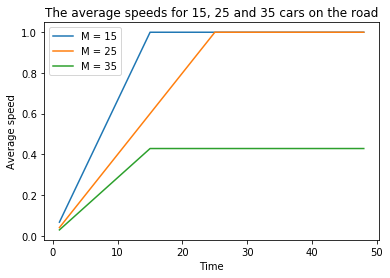

'We see that the average final speeds are not the same for all M, when there are 35 cars on the road the maximum average speed is only around 0.4, where that is 1 with 15 and 25 cars. If we put more than 25 cars on the road, it would mean that there are at least 2 cars after each other, which implies there is always one car at every point in time that has to wait. This means that the maximum average velocity of 1 can only be reached using 25 cars or less. '

In [4]:
def new_position(r, Traj, M, N):
    """
    Returns the position of all the cars at time t+1 using the position at time t, the current state of the road r, the number of
    cars M and the length of the road N.
    """
    next_Traj = np.zeros(M)
    position = Traj%(N + 1)                            # The position of all the cars at the road. Since Traj does not contain the positions on the road, but the total distance travelled, we use modulo (%) to see at which part of the road the car is positioned.
    for i in range(M):                                 # The position variable above puts cars at position 0 after the end of the road, instead of positin 1, this small loop corrects that
        if position[i] == 0:
            position[i] = 1

    car_no = position.argmin()                         # This variable finds the index of the first car on the road, we use this to make sure that we increase te trajectory of the right car
    
    for i in range(N - 1):
        if r[i] == 1:                                  # If there is a car at position i...
            if r[i + 1] == 0:                          # and no car in front...
                next_Traj[car_no] = Traj[car_no] + 1   # move to the next position                 
            
            elif r[i + 1] == 1:                        # If there is a car in front...
                next_Traj[car_no] = Traj[car_no]       # stay at the same position
            car_no = (car_no + 1)%M                    # increase the index of the Traj matrix / move to the next car
               
    if r[N - 1] == 1:                                  # If there is a car at the final position...
        if r[0] == 0:                                  # and the first position is available...
            next_Traj[car_no] = Traj[car_no] + 1       # move to the first position
        else:
            next_Traj[car_no] = Traj[car_no]           # Else: stay where you are
        car_no = (car_no + 1)%M
       
    return next_Traj


def new_updateR(Traj, N):
    """
    Takes the trajectory at time t+1 and returns a new position vector r at time t+1
    """
    r = np.zeros(N)
    for i in Traj:
        j = int(i%N)
        r[j - 1] = 1
    return r


def ave_vel(Traj, t, M):
    """
    Returns the average velocity of all cars at time t
    """
    if t > 0:                                              # Since t-1 is not defined when t=0, we start at t=1
        av_vel = (sum(Traj[:,t]) - sum(Traj[:,t - 1])) / M # If we take the sum of the columns at time t and t-1 and subtract those, we can see how many positions are gained in this timestep. We get the average velocity when we devide this number by M (the number of cars)
        return av_vel

    
def first_M_cars(Traj, M):
    """
    A small function which returns the first Traj column when there are M cars in the first M positions of the road
    """
    for i in range(M):
        Traj[i, 0] = i + 1                                   
    return Traj[:, 0]


def speed_time(Traj, T, N, M):
    """
    This function calculates the average speed of all the cars at every point in time and returns 2 vectors: one with the average speeds and one with the corresponding timepoints
    """
    avg_speed = []                                          
    time = []
    for t in range(T - 1):
        R = new_updateR(Traj[:, t], N)                      # Calculate the new position column R
        Traj[:, t + 1] = new_position(R, Traj[:, t], M, N)  # Calculate the trajectory at time t+1
    
        av_speed = ave_vel(Traj, t, M)                      # Calculate the average speed at time t
        avg_speed.append(av_speed)
        time.append(t)
    
    return avg_speed, time


# Question 2b, 1)
T = 4
M = 5
N = 9
Traj = np.zeros((T, M))                                     # Create a matrix Traj filled with zeros and change the first column into the initial trajectories vector              
Traj[0, :] = np.array([1, 4, 5, 6, 9])                  
Traj = np.transpose(Traj)                                   # For some wierd reason, Python does not let me change the column of a matrix with a column vector, so I create a transposed matrix and transpose it back afterwards

for t in range(3):                                          # Create the trajectory matrix iteratively
    R = new_updateR(Traj[:, t], N)
    Traj[:, t + 1] = new_position(R, Traj[:, t], M, N)
        
print(Traj, "\n We see that this is indeed the Traj matrix stated in the question")    

# Question 2b, 2)
T = 50
M = 15
N = 50
Traj = np.zeros((M, T))                               # Calculate all the necessary variables for M=15
Traj[:, 0] = first_M_cars(Traj, M)
avg_speed, time = speed_time(Traj, T, N, M) 

plt.plot(time, avg_speed, label = "M = 15")

print("\n We see that at time 15 we reach a steady average speed, when M is 15.")

# Question 2b, 3)
T = 50
M = 25
N = 50
Traj = np.zeros((M, T))                                # Calculate all the necessary variables for M=25
Traj[:, 0] = first_M_cars(Traj, M)
avg_speed, time = speed_time(Traj, T, N, M)  

plt.plot(time, avg_speed, label = "M = 25")

T = 50
M = 35
N = 50
Traj = np.zeros((M, T))                                # Calculate all the necessary variables for M=35
Traj[:, 0] = first_M_cars(Traj, M)
avg_speed, time = speed_time(Traj, T, N ,M) 

plt.plot(time, avg_speed, label = "M = 35")

plt.xlabel("Time")
plt.ylabel("Average speed")
plt.title("The average speeds for 15, 25 and 35 cars on the road")
plt.legend()
plt.show()
        
'''We see that the average final speeds are not the same for all M, when there are 35 cars on the road the maximum average speed is only around 0.4, where that is 1 with 15 and 25 cars. If we put more than 25 cars on the road, it would mean that there are at least 2 cars after each other, which implies there is always one car at every point in time that has to wait. This means that the maximum average velocity of 1 can only be reached using 25 cars or less. '''

4) Does the average speed of the cars depend on their initial configuration? To answer this question, initally fill $M = 20$ cars in $N=50$ cells in three different ways:

a) Fill the first 20 cells with 20 cars.

b) Use `random.sample(range(0,N),M)` to randomly distribute the cars (you will need to import `random` to use this function).

c) Put them in pairs with one cell space between the pairs. That is, fill the cells 1,2,4,5,7,8,10,11,... 

Plot the average speed of the cars as a function of time up to $T=50$ for each case and discuss the results.

5) Repeat the previous question for $M = 30$ cars. Does the average speed reach the same limit?

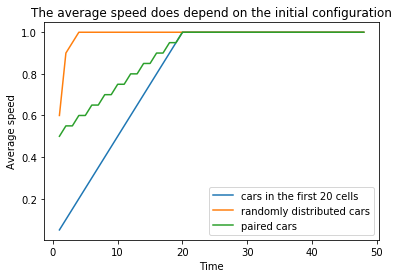

'It can clearly be seen that the average speed does depend on the initial configuration. Eventually all the configurations reach the same maximum average speed of 1.0 and it is notable that the situations in which we have 20 cars in the first 20 cells and in which we have paired cars reach this speed at the same moment. The 20 cars in the first 20 cells initially have the lowest average speed.'

In [5]:
# Question 2b, 4)
import random

M = 20
N = 50
T = 50

# a)
Traj = np.zeros((M, T))
Traj[:, 0] = first_M_cars(Traj, M)                # Fill the frist column of Traj with an increasing sequence corresponding to cars begin at the first M positions of the road  
avg_speed, time = speed_time(Traj, T, N ,M)       # Calculate the average speed and return a vector with the timepoints
    
plt.plot(time, avg_speed, label = "cars in the first 20 cells")
    
# b)
Traj = np.zeros((M, T))
x = random.sample(range(1, N), M)

def selection_sort(x):  
    """
    This function takes an array as input and returns it as an array with increasing values
    source: https://jakevdp.github.io/PythonDataScienceHandbook/02.08-sorting.html
    """
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

Traj[:, 0] = selection_sort(x)                    # Fill the first column of Traj with the sorted array wih random entries. We need a sorted array, since the rows of Traj correspond to the order in which the cars are on the road
avg_speed, time = speed_time(Traj, T, N ,M) 
    
plt.plot(time, avg_speed, label = "randomly distributed cars")

# c)
Traj = np.ones((M, T))

for i in range(1, M):                              # Fill the first column of the trajectory matrix with pairs
    Traj[i, 0] = Traj[i - 1, 0] + 1                # Fill the column with increasing values
    if i%2 == 0:                                   # If the index is divisible by 3...
        Traj[i, 0] = Traj[i - 1, 0] + 2            # increase the value by 2 to skip the 3rd value in a row
        
avg_speed, time = speed_time(Traj, T, N ,M) 
    
plt.plot(time, avg_speed, label = "paired cars")
plt.xlabel("Time")
plt.ylabel("Average speed")
plt.title("The average speed does depend on the initial configuration")
plt.legend()
plt.show()

'''It can clearly be seen that the average speed does depend on the initial configuration. Eventually all the configurations reach the same maximum average speed of 1.0 and it is notable that the situations in which we have 20 cars in the first 20 cells and in which we have paired cars reach this speed at the same moment. The 20 cars in the first 20 cells initially have the lowest average speed.'''

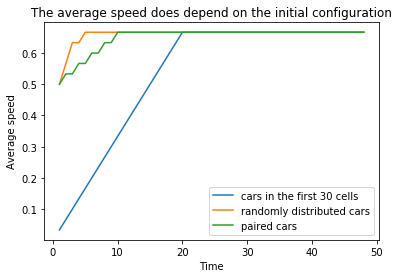

'we see that when we have 30 cars instead of 20, the maximum average speed is much lower, only around 0.7. This is in line with our conclusions from question 2b 3).'

In [6]:
# Question 2b, 5)
M = 30
N = 50
T = 50

# a)
Traj = np.zeros((M, T))                           # Calculate the necessary variables for cars in the first 30 cells
Traj[:, 0] = first_M_cars(Traj, M)              
avg_speed, time = speed_time(Traj, T, N ,M) 
    
plt.plot(time, avg_speed, label = "cars in the first 30 cells")
    
# b)
Traj = np.zeros((M, T))
x = random.sample(range(1, N),M)

Traj[:, 0] = selection_sort(x)                    # Again, use the sorting function to return the sorted array with random entries
avg_speed, time = speed_time(Traj, T, N ,M) 
    
plt.plot(time, avg_speed, label = "randomly distributed cars")

# c)
Traj = np.ones((M, T))

for i in range(1, M):                              # Fill the first column of the trajectory matrix with pairs
    Traj[i, 0] = Traj[i - 1, 0] + 1                # Fill the column with increasing values
    if i%2 == 0:                                   # If the index is divisible by 3...
        Traj[i, 0] = Traj[i - 1, 0] + 2            # increase the value by 2 to skip the 3rd value in a row
        
avg_speed, time = speed_time(Traj, T, N ,M) 
    
plt.plot(time, avg_speed, label = "paired cars")
plt.xlabel("Time")
plt.ylabel("Average speed")
plt.title("The average speed does depend on the initial configuration")
plt.legend()
plt.show()

'''we see that when we have 30 cars instead of 20, the maximum average speed is much lower, only around 0.7. This is in line with our conclusions from question 2b 3).'''

6) How does the number of cars affect the final average speed? In other words, we want to see how traffic fluidity depends on how busy the road is. Use `scipy.stats.bernoulli.rvs(p, size=N) ` to fill each cell in the inital configuration (see workshop 5 if you are not familiar with this function). This means the chance of having a car in a cell is `p`.  Therefore, if `N` is large enough, you expect to have `N*p` cars on the road. Set $N=800$, vary `p` from $0.2$ to $0.8$, and plot the average speed of cars at `T=200` as a function of `p`. Comment on the results. How does the number of cars affect their final average speed?

7) Repeat the last question for $N=50$ and $N = 2000$. Do the results change? Why?

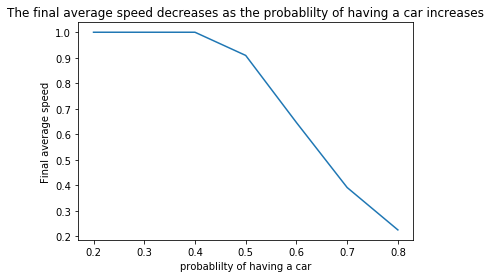

'As the probablilty of having a car at a certain position on the road increases, the final average speed decreases. This makes intuitively sense, since the probability that it gets busier on the road increases, which means more congestions and a lower speed.'

In [7]:
# Question 2b, 6)
import scipy.stats as st

def diff_nr_cars(N, T, p_vec):
    """
    Returns the final average speed when the initial number of cars varies. Using a Bernoulli distribution with varying
    p values, we determine the initial configuration.
    """
    avg_speed = []
    for p in p_vec:
        initialR = st.bernoulli.rvs(p, size=N)
        M = sum(initialR)                                # The sum of all the values in the position vector is the number of cars
    
        Traj = np.zeros((M, T))
        count = 0                                        # Indexing for the Traj matrix
        for i in range(N):                               # We do not know the position of the cars, so we use this little for loop to construt the first column of the Traj matrix
            if initialR[i] == 1:                         # If we find an index with a car...
                Traj[count, 0] = i +  1                  # add the index of this car (+ 1 because of initial index 0) to the first column in Traj 
                count += 1                               # Increase the count in the Traj matrix

        for t in range(T - 1):                           # In this loop we create the trjectory matrix
            R = new_updateR(Traj[:, t], N)
            Traj[:, t + 1] = new_position(R, Traj[:, t], M, N)

        speed = ave_vel(Traj, T - 1, M)                  # Calculate the speed at the final timepoint
        avg_speed.append(speed)
    
    return avg_speed

p_vec = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]              # Create a vector with different values for p
avg_speed = diff_nr_cars(800, 200, p_vec)

plt.plot(p_vec, avg_speed)
plt.xlabel("probablilty of having a car")
plt.ylabel("Final average speed")
plt.title("The final average speed decreases as the probablilty of having a car increases")
plt.show()

'''As the probablilty of having a car at a certain position on the road increases, the final average speed decreases. This makes intuitively sense, since the probability that it gets busier on the road increases, which means more congestions and a lower speed.'''

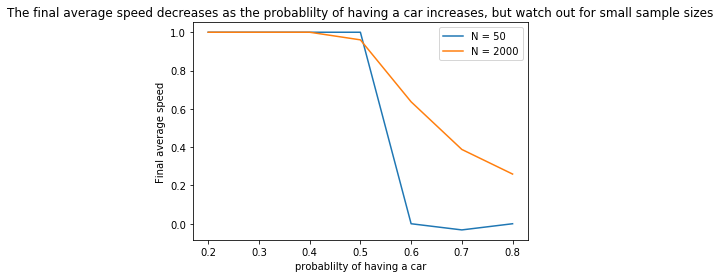

'Running this programme multiple times shows that the plot for N=50 is very unpredictable, this means that the number of positions on the road is too small to conclude anything about the research question. When N=2000 we do not see a very big difference with the results from the previous question, this confirms our previous conclusion with an ever bigger sample size. '

In [8]:
# Question 2b, 7)
p_vec = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8] 

avg_speed = diff_nr_cars(50, 200, p_vec)                 # Repeat the same steps as at the previous question
plt.plot(p_vec, avg_speed, label = "N = 50")

avg_speed = diff_nr_cars(2000, 200, p_vec)
plt.plot(p_vec, avg_speed, label = "N = 2000")
plt.xlabel("probablilty of having a car")
plt.ylabel("Final average speed")
plt.title("The final average speed decreases as the probablilty of having a car increases, but watch out for small sample sizes")
plt.legend()
plt.show()

'''Running this programme multiple times shows that the plot for N=50 is very unpredictable, this means that the number of positions on the road is too small to conclude anything about the research question. When N=2000 we do not see a very big difference with the results from the previous question, this confirms our previous conclusion with an ever bigger sample size. '''

### Task 2c - Fast and slow cars

Now imagine there are two types of cars on our road: fast cars who want to move with the speed of 2 cells per step if there are enough spaces in front of them, and the slow cars who always move with the speed of 1 cell per step as in the previous task. If there are less than two free cells in front of the fast cars, they either move one cell per step or don't move at all (like slow cars).

1) Numbering your cells from $1$ to $N=100$, put all fast cars initially in the prime indexed cells and the cells in the interval $(60,85]$. Now plot the position of the cars in the time interval $t=[0, 60]$. Do you think a part of road will stay congested forever? In which direction is the congested part of the traffic flow moving?

(You will find it helpful to construct a new function to help **`new_position2(r,Traj,Vel)`**, where the new vector `Vel` stores the velocity of each car).

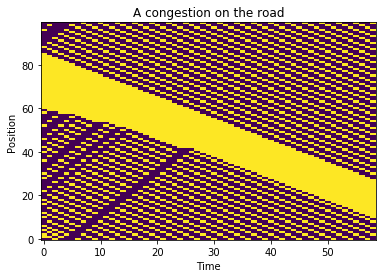

'There is a part of the road that will stay congested forever, since all the cars drive at the same speed, the congestion will just move over the road, but never dissolve. The congested part of the traffic flow is moving to the left of the street.'

In [9]:
# we start by writing some new functions to be more efficient in the long term.

def create_Traj(M, T):
    """
    Returns the first column of the Trajectory array when we put M cars at the first M spots on the road. 
    """
    Traj = np.zeros((M, T))
    count = 0                       # The count increases every time there is a car on the road and is used as indexing for Traj 
    for i in range(N):
        if R[i] == 1:               #  When there is a car in cell i...
            Traj[count, 0] = i +  1 # add this car to the Traj array
            count += 1              
    return Traj


def new_position2(r, Traj, Vel):
    """
    Returns the next column of te Trajectory array taking into account the distinction between fast and slow car by using the 
    vector Vel. This function is very similar to new_position, so the biggest part of the comments can be found in that 
    function.
    """
    next_Traj = np.zeros(M)
    
    position = Traj%(N + 1)
    for i in range(M):
        if position[i] == 0:
            position[i] = 1
            
    car_no = position.argmin() 
    
    for i in range(N - 2):
        if r[i] == 1:
            if (r[i + 1] == 0 and r[i + 2] == 0 and Vel[car_no] == 2): # If there are 2 spots available and we have a fast car...
                next_Traj[car_no] = Traj[car_no] + 2                   # move 2 cells         
            elif r[i + 1] == 0:                                        # Otherwise behave as a slow car
                next_Traj[car_no] = Traj[car_no] + 1
            elif r[i + 1] == 1:
                next_Traj[car_no] = Traj[car_no]
            car_no = (car_no + 1)%M
               
    if r[N - 1] == 1:                                                  # If there is a car at the final cell... 
        if (r[0] == 0 and r[1] == 0 and Vel[car_no] == 2):             # and there are 2 empty cells ahead and the car is fast...
            next_Traj[car_no] = Traj[car_no] + 2                       # move 2 cells
        elif r[0] == 0:                                                # Otherwise behave as a slow car
            next_Traj[car_no] = Traj[car_no] + 1
        elif r[0] == 1:
            next_Traj[car_no] = Traj[car_no]
        car_no = (car_no + 1)%M
    
    if r[N - 2] == 1:                                                  # If there is a car at the second final cell...
        if (r[N - 1] == 0 and r[0] == 0 and Vel[car_no] == 2):         # and there are 2 empty cells ahead and the car is fast...
            next_Traj[car_no] = Traj[car_no] + 2                       # move 2 cells
        elif r[N - 1] == 0:                                            # Otherwise behave as a slow car
            next_Traj[car_no] = Traj[car_no] + 1
        elif r[N - 1] == 1:
            next_Traj[car_no] = Traj[car_no]
        car_no = (car_no + 1)%M
            
    return next_Traj

def createR2(N, T):
    """
    Returns the position matrix R of size N x T, using the Trajectory columns obtained from new_position2
    """
    R = np.zeros((N, T))
    for t in range(T-1):
        R_next = new_updateR(Traj[:, t], N)                            # Create a new R column at time t
        Traj[:, t+1] = new_position2(R_next, Traj[:, t], Vel)          # Calculate the Traj vector at time t+1
        R[:, t] = R_next                                               # Add the new column of R to R. 
    return R

# Question 2c, 1)
N = 100
T = 60

# Construct the initial position array and take the sum of this vector to calculate M, the number of cars.
R = primeVec(N)
R[61: 86] = 1
M = int(sum(R))

# The faster cars have velocity 2
Vel = 2 * np.ones(M)

Traj = create_Traj(M, T)
R = createR2(N, T)
subset = R[:, 0: T-1]

plt.imshow(subset, aspect = 'auto', origin = "lower")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("A congestion on the road")
plt.show()

'''There is a part of the road that will stay congested forever, since all the cars drive at the same speed, the congestion will just move over the road, but never dissolve. The congested part of the traffic flow is moving to the left of the street.'''

2) Now put fast cars initially in the prime indexed cells only like those in the last question, but this time make the last car (in cell 97) slow (i.e. moving only one cell per step). How does this car affect the whole traffic flow?

3) By running the simulation up to $T = 100$, calculate the average velocity of the cars at this final time.

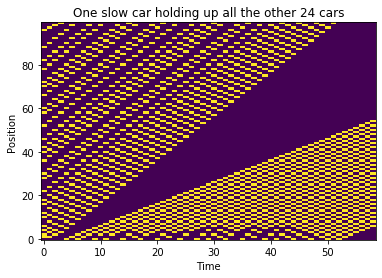

' We see from the plot that the slow car is holding up all the faster cars, which results in an increasingly bigger part of the road being empty.'

In [10]:
# Question 2c, 2)
N = 100
T = 60
R = primeVec(N)
M = int(sum(R))

# Create the vector with the velocities per car, the faster cars have value 2, the slower ones value 1.
Vel = 2 * np.ones(M)
Vel[-1] = 1

# Create the initial Traj vector
Traj = create_Traj(M, T)

# Create the R matrix
R = createR2(N, T)
subset = R[:, 0: 59]

plt.imshow(subset, aspect = 'auto', origin = "lower")
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("One slow car holding up all the other 24 cars")
plt.show()

''' We see from the plot that the slow car is holding up all the faster cars, which results in an increasingly bigger part of the road being empty.'''

In [11]:
# Question 2c, 3)
N = 100
T = 101
R = primeVec(N)
M = int(sum(R))

# Create the vector with the velocities per car, the faster cars have value 2, the slower ones value 1.
Vel = 2 * np.ones(M)
Vel[-1] = 1

# Create the initial Traj vector
Traj = create_Traj(M, T)

# Create the R matrix
R = createR2(N, T)
subset = R[:, 0: 59]

avg_speed = ave_vel(Traj, T-1, M)
print("The average velocity of the cars at time 100 is:", avg_speed)

The average velocity of the cars at time 100 is: 1.0
